In [1]:
!pip install --quiet nltk textblob
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from textblob import TextBlob
import nltk, re, string
nltk.download('punkt')
sns.set(style="whitegrid")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('ai_in_education_tweets.csv')
df.head()

,date,username,tweet
0,2025-03-12,user_32,Concerned about AI replacing teachers.
1,2025-06-23,user_95,AI personalized my learning journey!
2,2025-06-01,user_55,AI integration in education is interesting.
3,2025-02-25,user_30,AI personalized my learning journey!
4,2025-05-24,user_26,Concerned about AI replacing teachers.


In [3]:
# 🧹 3. Clean text
def clean(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)            # URLs
    text = re.sub(r"@\w+|#\w+", "", text)                          # mentions/hashtags
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text.lower().strip()

df['clean_text'] = df['tweet'].apply(clean)


In [4]:
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = pd.cut(df['polarity'],
                         bins=[-1, -0.05, 0.05, 1],
                         labels=['Negative', 'Neutral', 'Positive'])
df.head()

,date,username,tweet,clean_text,polarity,sentiment
0,2025-03-12,user_32,Concerned about AI replacing teachers.,concerned about ai replacing teachers,0.0,Neutral
1,2025-06-23,user_95,AI personalized my learning journey!,ai personalized my learning journey,0.0,Neutral
2,2025-06-01,user_55,AI integration in education is interesting.,ai integration in education is interesting,0.5,Positive
3,2025-02-25,user_30,AI personalized my learning journey!,ai personalized my learning journey,0.0,Neutral
4,2025-05-24,user_26,Concerned about AI replacing teachers.,concerned about ai replacing teachers,0.0,Neutral


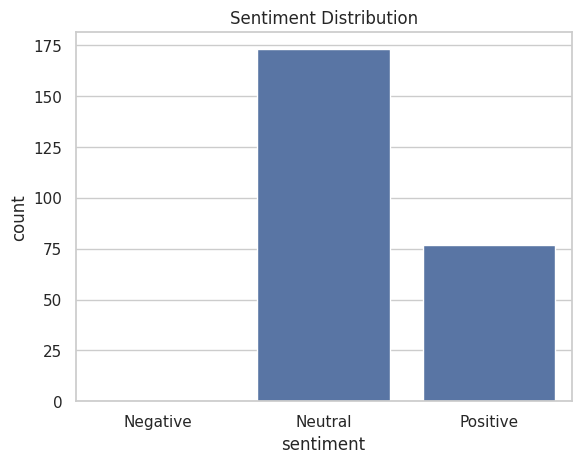

In [5]:
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution'); plt.show()

/tmp/ipython-input-6-2339287385.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily = df.groupby([df['date'].dt.to_period('W'), 'sentiment']).size().unstack().fillna(0)


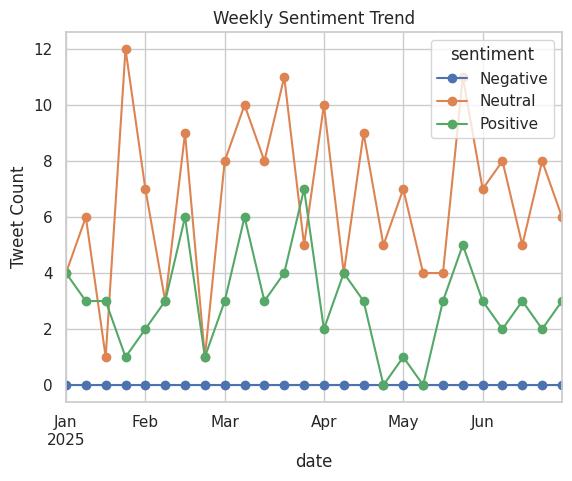

In [6]:
df['date'] = pd.to_datetime(df['date'])
daily = df.groupby([df['date'].dt.to_period('W'), 'sentiment']).size().unstack().fillna(0)
daily.plot(marker='o'); plt.title('Weekly Sentiment Trend'); plt.ylabel('Tweet Count'); plt.show()